In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from scipy import stats

# Read and clean data
df = pd.read_csv("assignment_3_dataset.csv")
# Clean data by removing duplicates
df = df.drop_duplicates()

# Standardize language names (convert to title case)
df['lang'] = df['lang'].str.title()

# Convert numeric columns§§
for col in ['z1000t','z0t','z1000mem','stmtL','z1000rel','m1000rel','whours']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Print unique language names to verify cleaning
print("Unique languages after cleaning:")
print(df['lang'].unique())

Unique languages after cleaning:
['C' 'C++' 'Java' 'Perl' 'Python' 'Rexx' 'Tcl']


Summary statistics:

Log-transformed scaling ratio by language:
        count      mean       std       min       25%       50%       75%  \
lang                                                                        
C         3.0  0.781370  0.152806  0.693147  0.693147  0.693147  0.825481   
C++      10.0  2.609763  2.227372  0.693147  0.693147  1.620110  3.990166   
Java     23.0  2.428899  2.059762  0.737513  0.824743  1.376805  3.844708   
Perl     12.0  1.480098  1.534582  0.718352  0.759997  0.850494  0.962998   
Python   12.0  1.236977  1.186016  0.739939  0.804526  0.853590  1.031089   
Rexx      3.0  2.609870  1.127850  1.314619  2.227340  3.140060  3.257495   
Tcl       9.0  1.633879  1.719894  0.749018  0.790540  0.837018  0.984570   

             max  
lang              
C       0.957815  
C++     6.476180  
Java    6.610696  
Perl    5.420535  
Python  4.980863  
Rexx    3.374929  
Tcl     5.772622  
        count      mean       std       min       25%       50%       7

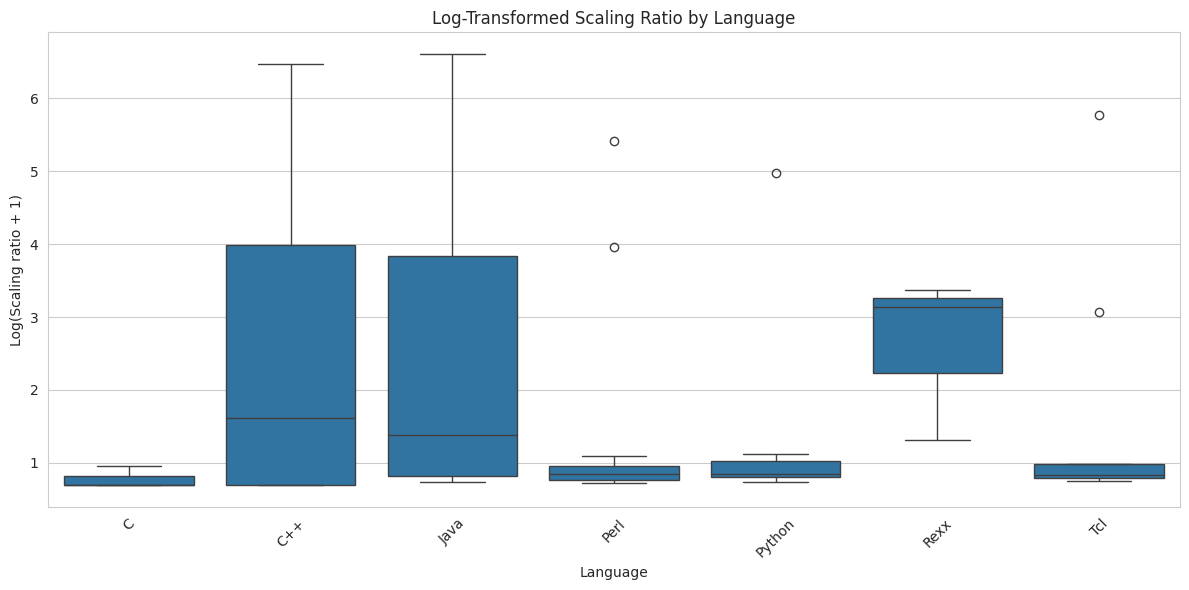

In [37]:
# Graph 3: Check scalability / efficiency growth
sns.set_style('whitegrid')

# Remove rows where z1000t or z0t is empty/NaN and create a copy
df_clean = df.dropna(subset=['z1000t', 'z0t']).copy()

# Compute scaling ratio, avoiding the SettingWithCopyWarning
df_clean.loc[:, 'scaling_ratio'] = df_clean['z1000t'] / df_clean['z0t'].replace(0, np.nan)
# Replace infinite values with NaN
df_clean.loc[df_clean['scaling_ratio'].isin([np.inf, -np.inf]), 'scaling_ratio'] = np.nan

# Apply log transformation to handle large ratios (adding small constant to handle zeros)
df_clean.loc[:, 'scaling_ratio_log'] = np.log1p(df_clean['scaling_ratio'])

# Create single plot with log-transformed data
plt.figure(figsize=(12,6))
sns.boxplot(data=df_clean, x='lang', y='scaling_ratio_log')
plt.title('Log-Transformed Scaling Ratio by Language')
plt.xlabel('Language')
plt.ylabel('Log(Scaling ratio + 1)')
plt.xticks(rotation=45)
plt.tight_layout()

# Print summary statistics
print("Summary statistics:")
print("\nLog-transformed scaling ratio by language:")
print(df_clean.groupby('lang')['scaling_ratio_log'].describe())

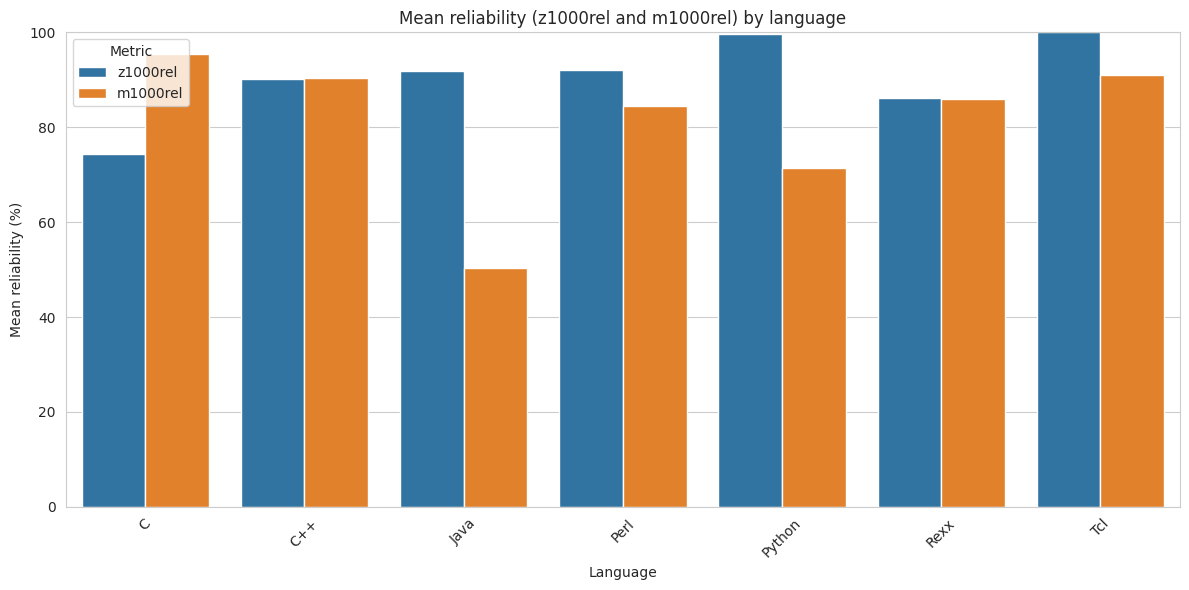

In [38]:
# Graph 5: Compare reliability across problem types
# Grouped barplot showing mean z1000rel and m1000rel per language
# Ensure numeric conversion already done in previous cell
df_rel = df.groupby('lang')[['z1000rel','m1000rel']].mean().reset_index()
df_melt = df_rel.melt(id_vars='lang', value_vars=['z1000rel','m1000rel'],
                      var_name='metric', value_name='mean_reliability')
plt.figure(figsize=(12,6))
sns.barplot(data=df_melt, x='lang', y='mean_reliability', hue='metric')
plt.title('Mean reliability (z1000rel and m1000rel) by language')
plt.ylim(0, 100)
plt.xlabel('Language')
plt.ylabel('Mean reliability (%)')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.tight_layout()

Data points for Graph 6: 73


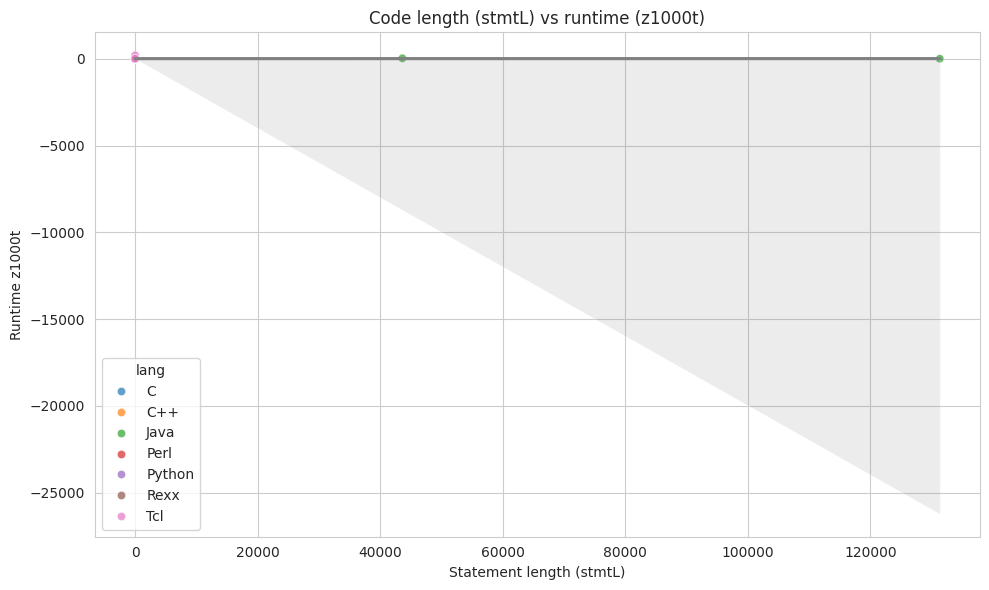

In [ ]:
# Graph 6: Relation between code size (stmtL) and runtime (z1000t)


df_G6 = df.dropna(subset=['stmtL', 'z1000t']).copy()
print(f"Data points for Graph 6: {len(df_G6)}")
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_G6, x='stmtL', y='z1000t', hue='lang', alpha=0.7)
# Use standard regression instead of lowess
sns.regplot(data=df_G6.dropna(subset=['stmtL','z1000t']),
            x='stmtL', y='z1000t',
            scatter=False,
            color='gray')
plt.title('Code length (stmtL) vs runtime (z1000t)')
plt.xlabel('Statement length (stmtL)')
plt.ylabel('Runtime z1000t')
plt.tight_layout()

# print("Summary statistics:")
# print("\nLog-transformed scaling ratio by language:")
# print(df_G6.groupby('lang')['scaling_ratio_log'].describe())

Graph 8: using 73 rows (dropped 7 rows with missing/inf values)


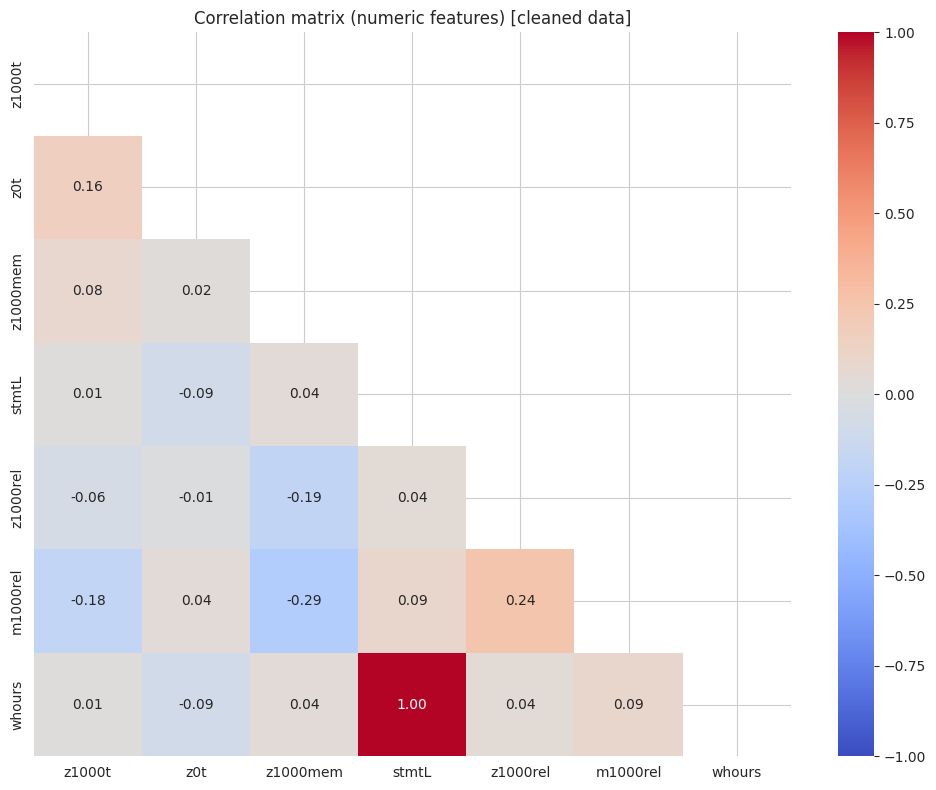

In [40]:
# Graph 8: Correlation heatmap between numeric features (clean data first)
num_cols = ['z1000t','z0t','z1000mem','stmtL','z1000rel','m1000rel','whours']
# Make a working copy and ensure numeric types
df_corr = df.copy()
df_corr[num_cols] = df_corr[num_cols].apply(pd.to_numeric, errors='coerce')
before = len(df_corr)
# Drop rows with any NaN in the numeric columns
df_corr = df_corr.dropna(subset=num_cols).reset_index(drop=True)
# Remove rows with infinite values (if any)
df_corr = df_corr.replace([np.inf, -np.inf], np.nan).dropna(subset=num_cols).reset_index(drop=True)
after = len(df_corr)
print(f"Graph 8: using {after} rows (dropped {before-after} rows with missing/inf values)")
if after == 0:
    print("No data available to compute correlations after cleaning.")
else:
    corr = df_corr[num_cols].corr()
    plt.figure(figsize=(10,8))
    mask = np.triu(np.ones_like(corr, dtype=bool))
    sns.heatmap(corr, annot=True, fmt='.2f', mask=mask, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation matrix (numeric features) [cleaned data]')
    plt.tight_layout()
    plt.show()

Graph 11: using 77 rows (dropped 3 rows with missing/inf values)


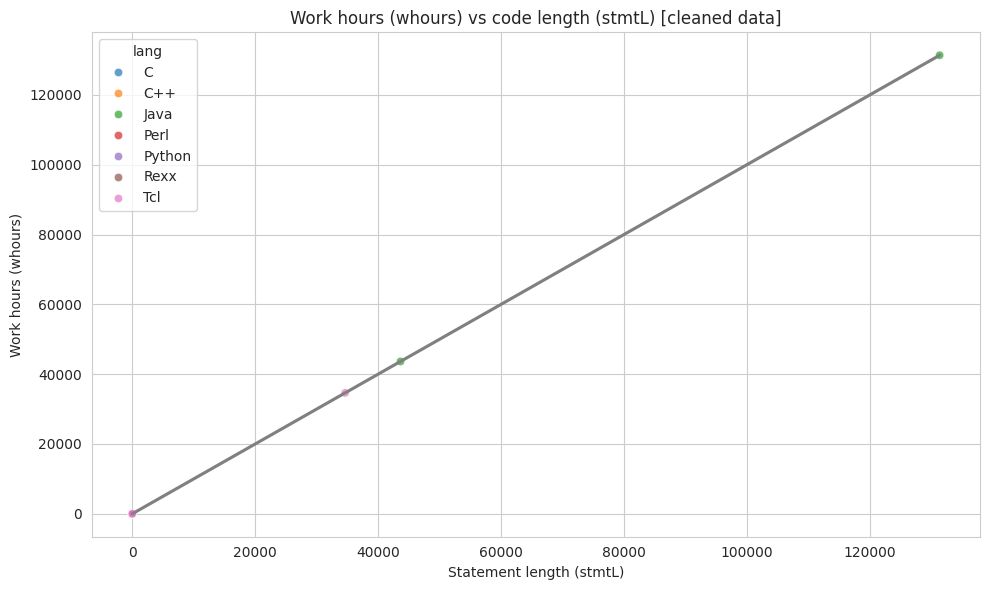

In [41]:
# Graph 11: Check relation between work time (whours) and code length (stmtL) (clean data first)
num_cols = ['stmtL', 'whours']
# Working copy and ensure numeric types
df_g11 = df.copy()
df_g11[num_cols] = df_g11[num_cols].apply(pd.to_numeric, errors='coerce')
before = len(df_g11)
# Drop rows with missing or non-numeric values in the key columns
df_g11 = df_g11.dropna(subset=num_cols).reset_index(drop=True)
# Remove infinite values if present
df_g11 = df_g11.replace([np.inf, -np.inf], np.nan).dropna(subset=num_cols).reset_index(drop=True)
after = len(df_g11)
print(f"Graph 11: using {after} rows (dropped {before-after} rows with missing/inf values)")
if after == 0:
    print('No data available to plot work hours vs code length after cleaning.')
else:
    plt.figure(figsize=(10,6))
    sns.scatterplot(data=df_g11, x='stmtL', y='whours', hue='lang', alpha=0.7)
    # Regression line on cleaned data
    sns.regplot(data=df_g11.dropna(subset=['stmtL','whours']),
                x='stmtL', y='whours',
                scatter=False,
                color='gray')
    plt.title('Work hours (whours) vs code length (stmtL) [cleaned data]')
    plt.xlabel('Statement length (stmtL)')
    plt.ylabel('Work hours (whours)')
    plt.tight_layout()
    plt.show()